!pip install azure-monitor-query
!pip install azure-identity

In [25]:
import os
from datetime import timedelta, datetime
from azure.monitor.query import MetricsQueryClient
from azure.identity import DefaultAzureCredential

credential = DefaultAzureCredential()
metrics_client = MetricsQueryClient(credential)

Ensure your service principal has "Monitor Reader" Role on Cognitive Service Resource
https://github.com/Azure/azure-sdk-for-python/blob/main/sdk/monitor/azure-monitor-query/README.md


In [48]:
os.environ["AZURE_CLIENT_ID"] = "XXXXXX"
os.environ["AZURE_TENANT_ID"]= "XXXXXX"
os.environ["AZURE_CLIENT_SECRET"] = "XXXXXX"


In [49]:
resource_id = "/subscriptions/[SubscriptionID]/RESOURCEGROUPS/[ResourceGroup]/PROVIDERS/MICROSOFT.COGNITIVESERVICES/ACCOUNTS/[AOAI-Instance]/"



In [39]:
client = metrics_client
start_time = datetime(2023, 5, 1)
end_time =  datetime(2023, 5, 2)
duration = timedelta(days=7)
response = client.query_resource(
    resource_uri = resource_id,
    metric_names=["TotalCalls"],
    timespan=(start_time, duration),
    filter="RateLimitKey eq '*'",
    granularity=timedelta(days=1)
    
    )


Datetime with no tzinfo will be considered UTC.
C:\Users\jacwang\Anaconda3\envs\gradio\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'management.azure.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [40]:
for metric in response.metrics:
    print(metric.name)
    for time_series_element in metric.timeseries:
        print(time_series_element.metadata_values)
        for metric_value in time_series_element.data:
            print(metric_value.__dict__)

TotalCalls
{'ratelimitkey': 'deployments.davinci3.partition_0'}
{'timestamp': datetime.datetime(2023, 5, 1, 0, 0, tzinfo=<isodate.tzinfo.Utc object at 0x0000011B052CFB80>), 'average': None, 'minimum': None, 'maximum': None, 'total': 157, 'count': None}
{'timestamp': datetime.datetime(2023, 5, 2, 0, 0, tzinfo=<isodate.tzinfo.Utc object at 0x0000011B052CFB80>), 'average': None, 'minimum': None, 'maximum': None, 'total': 17, 'count': None}
{'timestamp': datetime.datetime(2023, 5, 3, 0, 0, tzinfo=<isodate.tzinfo.Utc object at 0x0000011B052CFB80>), 'average': None, 'minimum': None, 'maximum': None, 'total': 0, 'count': None}
{'timestamp': datetime.datetime(2023, 5, 4, 0, 0, tzinfo=<isodate.tzinfo.Utc object at 0x0000011B052CFB80>), 'average': None, 'minimum': None, 'maximum': None, 'total': 0, 'count': None}
{'timestamp': datetime.datetime(2023, 5, 5, 0, 0, tzinfo=<isodate.tzinfo.Utc object at 0x0000011B052CFB80>), 'average': None, 'minimum': None, 'maximum': None, 'total': 2, 'count': None

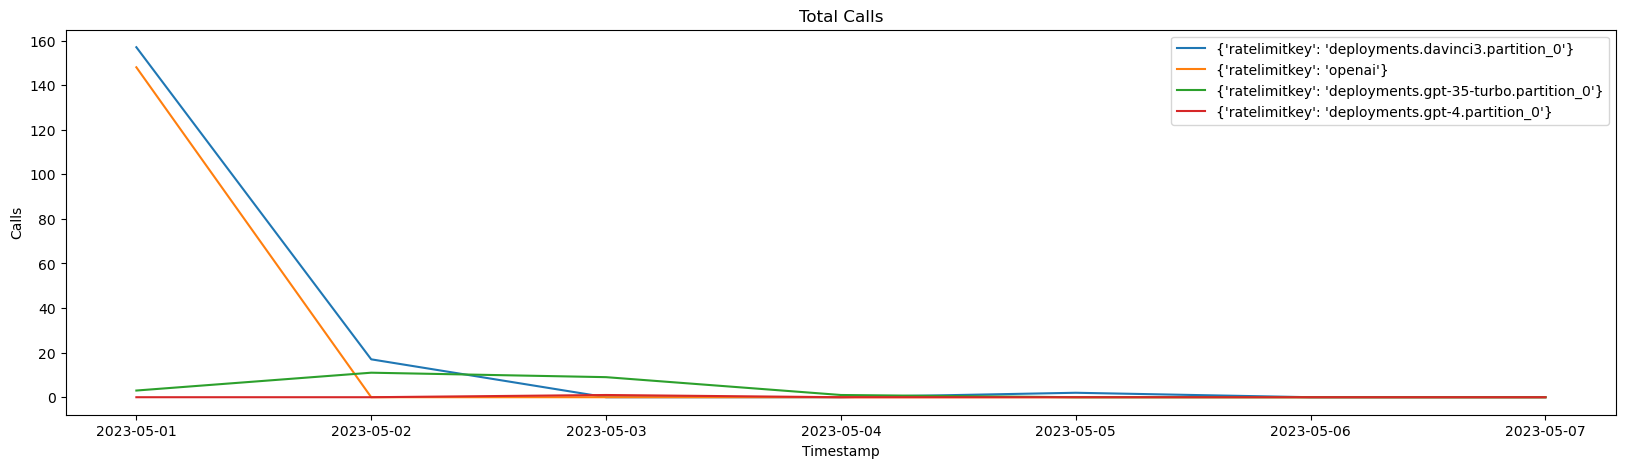

In [41]:
import matplotlib.pyplot as plt

# Sample data
fig, ax = plt.subplots(figsize=(20, 5))

for time_series_element in metric.timeseries:
    data = []
    label = time_series_element.metadata_values
    for metric_value in time_series_element.data:
        data.append(metric_value)
        
    # Extract x and y values
    x = [d.timestamp for d in data]
    y = [d.total for d in data]
    ax.plot(x, y, label =label) 
    



# Add labels and title
# Add labels and title
ax.set_xlabel('Timestamp')
ax.set_ylabel('Calls')
ax.set_title('Total Calls')
# Create plot

ax.legend() 

plt.show()


In [42]:
response = client.query_resource(
    resource_uri = resource_id,
    metric_names=["Latency"],
    timespan=(start_time, duration),
    filter="RateLimitKey eq '*'",
    granularity=timedelta(days=1)
    )

Datetime with no tzinfo will be considered UTC.
C:\Users\jacwang\Anaconda3\envs\gradio\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'management.azure.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [43]:
for metric in response.metrics:
    print(metric.name)
    for time_series_element in metric.timeseries:
        print(time_series_element.metadata_values)
        for metric_value in time_series_element.data:
            print(metric_value.__dict__)

Latency
{'ratelimitkey': 'deployments.davinci3.partition_0'}
{'timestamp': datetime.datetime(2023, 5, 1, 0, 0, tzinfo=<isodate.tzinfo.Utc object at 0x0000011B052CFB80>), 'average': 1429.3184713375797, 'minimum': None, 'maximum': None, 'total': None, 'count': None}
{'timestamp': datetime.datetime(2023, 5, 2, 0, 0, tzinfo=<isodate.tzinfo.Utc object at 0x0000011B052CFB80>), 'average': 3203.529411764706, 'minimum': None, 'maximum': None, 'total': None, 'count': None}
{'timestamp': datetime.datetime(2023, 5, 3, 0, 0, tzinfo=<isodate.tzinfo.Utc object at 0x0000011B052CFB80>), 'average': None, 'minimum': None, 'maximum': None, 'total': None, 'count': None}
{'timestamp': datetime.datetime(2023, 5, 4, 0, 0, tzinfo=<isodate.tzinfo.Utc object at 0x0000011B052CFB80>), 'average': None, 'minimum': None, 'maximum': None, 'total': None, 'count': None}
{'timestamp': datetime.datetime(2023, 5, 5, 0, 0, tzinfo=<isodate.tzinfo.Utc object at 0x0000011B052CFB80>), 'average': 2246, 'minimum': None, 'maximum'

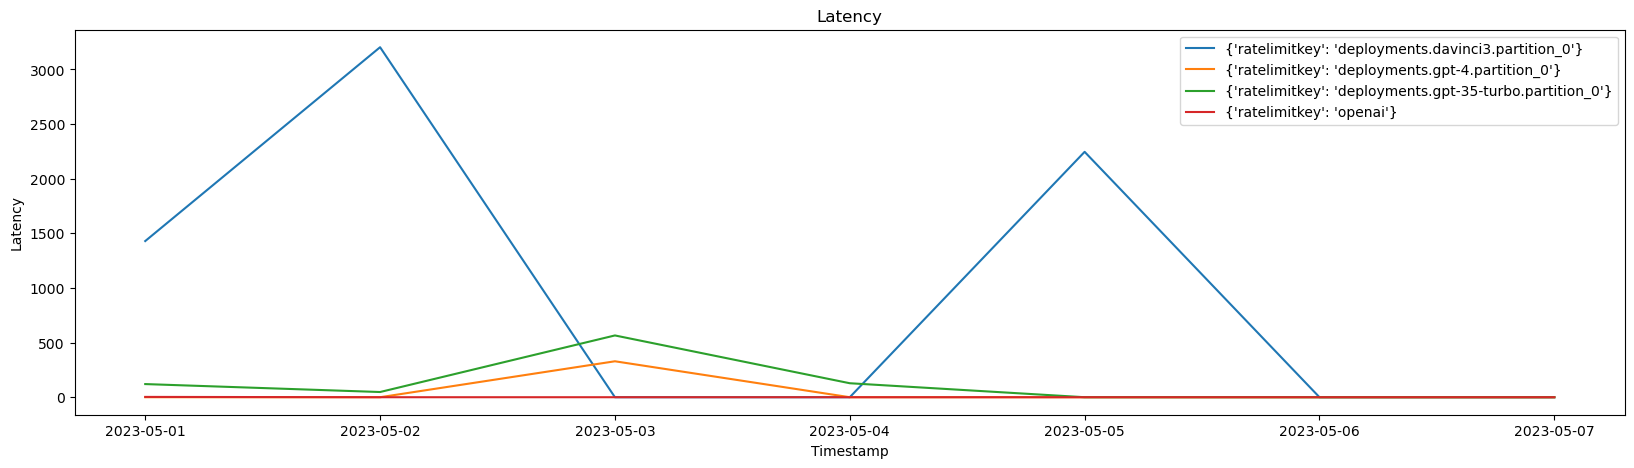

In [44]:
import matplotlib.pyplot as plt

# Sample data
fig, ax = plt.subplots(figsize=(20, 5))

for time_series_element in metric.timeseries:
    data = []
    label = time_series_element.metadata_values
    for metric_value in time_series_element.data:
        data.append(metric_value)
        
    # Extract x and y values
    x = [d.timestamp for d in data]
    y = [d.average if d.average else 0 for d in data]
    ax.plot(x, y, label =label) 
    



# Add labels and title
# Add labels and title
ax.set_xlabel('Timestamp')
ax.set_ylabel('Latency')
ax.set_title('Latency')
# Create plot

ax.legend() 

plt.show()

In [45]:
response = client.query_resource(
    resource_uri = resource_id,
    metric_names=["ProcessedPromptTokens"],
    timespan=(start_time, duration),
    filter="FeatureName eq '*'",
    granularity=timedelta(days=1)
    )

Datetime with no tzinfo will be considered UTC.
C:\Users\jacwang\Anaconda3\envs\gradio\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'management.azure.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [46]:
for metric in response.metrics:
    print(metric.name)
    for time_series_element in metric.timeseries:
        print(time_series_element.metadata_values)
        for metric_value in time_series_element.data:
            print(metric_value.__dict__)

ProcessedPromptTokens
{'featurename': 'text-davinci-003'}
{'timestamp': datetime.datetime(2023, 5, 1, 0, 0, tzinfo=<isodate.tzinfo.Utc object at 0x0000011B052CFB80>), 'average': None, 'minimum': None, 'maximum': None, 'total': 4622, 'count': None}
{'timestamp': datetime.datetime(2023, 5, 2, 0, 0, tzinfo=<isodate.tzinfo.Utc object at 0x0000011B052CFB80>), 'average': None, 'minimum': None, 'maximum': None, 'total': 7687, 'count': None}
{'timestamp': datetime.datetime(2023, 5, 3, 0, 0, tzinfo=<isodate.tzinfo.Utc object at 0x0000011B052CFB80>), 'average': None, 'minimum': None, 'maximum': None, 'total': 0, 'count': None}
{'timestamp': datetime.datetime(2023, 5, 4, 0, 0, tzinfo=<isodate.tzinfo.Utc object at 0x0000011B052CFB80>), 'average': None, 'minimum': None, 'maximum': None, 'total': 0, 'count': None}
{'timestamp': datetime.datetime(2023, 5, 5, 0, 0, tzinfo=<isodate.tzinfo.Utc object at 0x0000011B052CFB80>), 'average': None, 'minimum': None, 'maximum': None, 'total': 0, 'count': None}
{

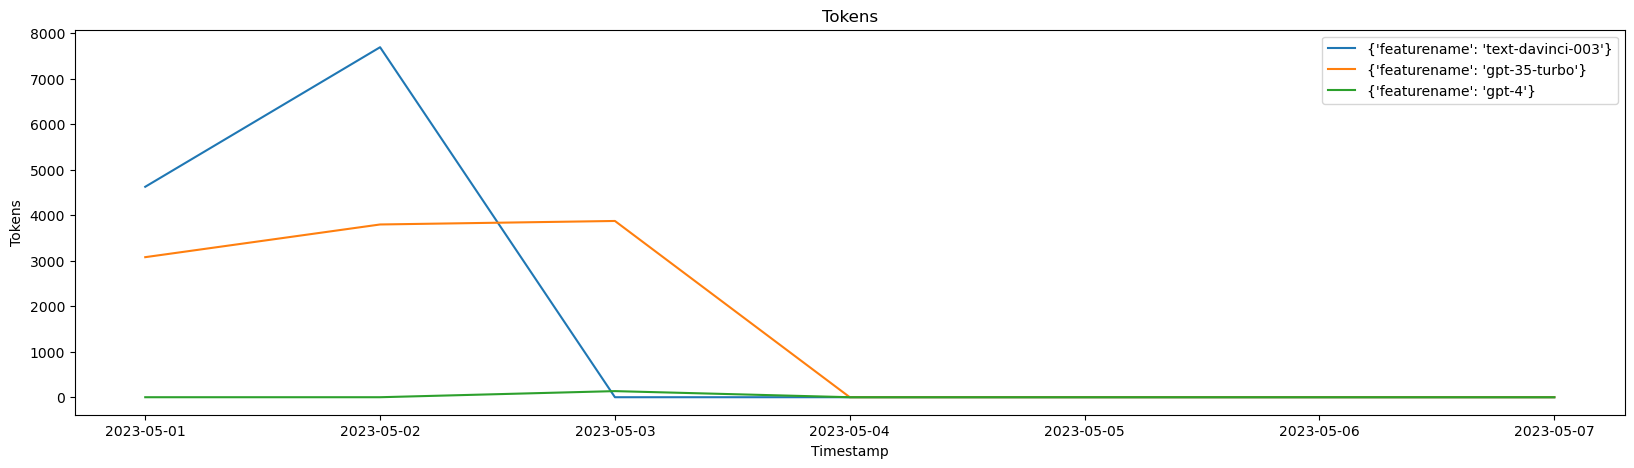

In [47]:
# Sample data
fig, ax = plt.subplots(figsize=(20, 5))

for time_series_element in metric.timeseries:
    data = []
    label = time_series_element.metadata_values
    for metric_value in time_series_element.data:
        data.append(metric_value)
        
    # Extract x and y values
    x = [d.timestamp for d in data]
    y = [d.total if d.total else 0 for d in data]
    ax.plot(x, y, label =label) 
    



# Add labels and title
# Add labels and title
ax.set_xlabel('Timestamp')
ax.set_ylabel('Tokens')
ax.set_title('Tokens')
# Create plot

ax.legend() 

plt.show()